In [1]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
import pylab
import scipy.stats as stats
from scipy.stats import shapiro
import scipy.stats as stats 
import statsmodels.stats.api as sms
import numpy as np 
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import statsmodels.formula.api as smf

In [2]:
class Information():
    def __init__(self,data):
        self.data=data
    def Describe(self):
        print(self.data.describe().T)
    def Info(self):
        print(self.data.info())
    def Head(self):
        print(self.data.head())
    def ColumnTypes(self):
        print(self.data.dtypes)
    def NullValues(self):
        print(self.data.isnull().values.any())
        print(self.data.isnull().sum())
    def Count(self):
        print(self.data.count())
    def Num_data(self):
        print(self.data.select_dtypes(include=['float64','int64']))
    def Cat_data(self):
        print(self.data.select_dtypes(include=["object"]))
        

In [87]:
class Visualization():
    def __init__(self,data):
        self.data = data
        
    def barplot(self,x,y,z = None):
        bar = sns.barplot(x = x, y = y, hue = z, data = self.data);
        return bar
    
    def catplot(self, x, y, z = None):
        cat = sns.catplot(x = x, y = y, hue = z, data = self.data);
        return cat
    
    def histogram(self,x, y = None):
        hist = sns.FacetGrid(self.data, hue = y, height = 5, xlim = (0, 10000)).map(sns.kdeplot, x, shade= True).add_legend();
        return hist
    
    def boxplot(self,x, y = None, z = None):
        box = sns.boxplot(x = x, y = y, hue = z, data=self.data);
        return box
    
    def jointplot(self,x,y):
        joint = sns.jointplot(x = x, y = y ,data = self.data, kind = "reg");
        return joint
    
    def scatter(self, x, y, z = None, s = None):
        sca = sns.scatterplot(x = x, y = y, hue=z, size = s, data = self.data);
        return sca
    
    def lmplot(self, x, y, z = None, c = None, r = None):
        lm = sns.lmplot(x = x, y = y, hue = z, col = c, row = r, data = self.data);
        return lm
    
    def pairplot(self, x = None):
        pair = sns.pairplot(self.data, kind = "reg", hue = x);
        return pair
    
    def heatmap(self):
        heat = sns.heatmap(self.data, annot = True, fmt = "d");
        return heat 
    
    def lineplot(self, x, y, z = None, s = None):
        lin = sns.lineplot(x = x, y = y, hue = z, style = s, markers = True,  dashes = False, data = self.data);
        return lin
    
    def countplot(self, column):
        count = sns.countplot(self.data.iloc[:,column], data = self.data, palette = "Set3");
        return count
    
    def cross_tab(self,x,y):
        cross = pd.crosstab(x, y)
        return cross

    def PieChart(self):
        pie = plt.pie(self.data, labels = self.data.index, counterclock = False, shadow = True)
        return pie
    
    def violin(self, x = None, y = None, z = None):
        vio = sns.catplot(x = x, y = y, hue = z, kind = "violin", data = self.data);
        return vio

In [4]:
class PreProcessing:
    
    def __init__(self, data):
        self.data = data

    def Delete_col(self, inplace):
        del_col = self.data.dropna(axis=1, inplace=inplace)
        return del_col
    
    def Delete_row(self, inplace):
        del_row = self.data.dropna(axis=0, inplace=inplace)
        return del_row
    
    def calc_vif(self):
        vif["variables"] = self.data.columns
        vif["VIF"] = [variance_inflation_factor(self.data.values, i) for i in range(self.data.shape[1])]
        return(vif)

    def Dummy(self):
        dummy_data = pd.get_dummies(self.data)
        return dummy_data

    def DropColumn(self, column):
        drop =  self.data.drop(column, inplace=True, axis=1)
        return drop

    def Label_Encoder(self, column):
        label_encoder = preprocessing.LabelEncoder()
        LE = label_encoder.fit_transform(self.data[column])
        return LE
    

In [5]:
class statistic():
    def __init__(self, data):
        self.data=data
        
        
    def shapiro(self):
        for col in self.data.columns[1:]:
            if self.data[col].dtypes != object :
                stat, p = shapiro(self.data[col])
                print('Shapiro Statistics=%.3f, p=%.3f' % (stat, p))
            alpha = 0.05
            if p > alpha:
                print(col)
                print('\033[1m'+ col + '\033[0m','Örneklem Normal (Gaussian) dağılımdan gelmektedir (fail to Reject) \n')
            else:
                print('\033[1m'+ col + ":"+'\033[0m','Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0)\n')
        
        
    def spearmanr(self, col_1, col_2):
        stats.spearmanr(self.data[col_1],self.data[col_2])
        alpha=0.05
        if(p>alpha):
            print('Statistics=%.3f, p=%.3f' % (stat,p), 'aralarındaki bu ilişki anlamsızdır') 
        else:
            print('Statistics=%.3f, p=%.3f' % (stat,p), 'aralarında bir ilişki vardır ve bu ilişki anlamlıdır')
        
    def leneve(self, col_1, col_2):
        stats.levene(self.data[col_1],self.data[col_2])
        print('Statistics=%.3f, p=%.3f' % (stat,p))
        
        
    def ttest_one(self,column,popmean):
        stat, p = self.stats.ttest_one(self.data[column], popmean = popmean)
        print("Statistics:%3.3f, p=%.3f " % (stat,p))
        
    def ttest_two(self, col_1, col_2):
        columns = pd.concat([self.data[col_1],self.data[col_2]], axis=1)
        stat, p=stats.ttest_ind(columns[col_1],columns[col_1], equal_var = False )
        print("Statistics:%3.3f, p=%.3f " % (stat,p))
        
        

In [6]:
import pandas as pd
from pandas import Series, DataFrame
data1=pd.read_csv("hmelq.csv")
data=data1.copy()

* bad = 1: temerrüte düsme yani borcu odememe durumu. 0: odeme yapilmis
* loan = talep edilen kredi miktari
* mortdue = mevcut Mortgage borclari
* value = guncel mal-mulk degeri
* reason = DebtCon: kısa süreli borçların uzun süreli ya da süresiz borca dönüştürülmesi(borclarin birlestirilmesi), Homelmp: * * evin dekorasyonu vb sebepten istenme durumu
* job = meslek durumu
* yoj = mevcut iste gecirilen yil
* derog = baslica ihlal edici, uygunsuz davranis raporlarinin sayisi
* delinq = odenmemis kredi kredi limitinin sayisi
* clage = aylarin icerisindeki en eski kredi limitinin yasi
* ninq = güncel,son kredi sorgusunun sayisi
* clno = kredi limit sayisi
* debtinc = borc gelir orani

In [7]:
inf_data = Information(data)

In [8]:
inf_data.Info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3262 non-null   float64
 3   value    3512 non-null   float64
 4   reason   3429 non-null   object 
 5   job      3409 non-null   object 
 6   yoj      3264 non-null   float64
 7   derog    3149 non-null   float64
 8   delinq   3225 non-null   float64
 9   clage    3397 non-null   float64
 10  ninq     3273 non-null   float64
 11  clno     3443 non-null   float64
 12  debtinc  2809 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB
None


In [23]:
inf_data.Describe()

          count           mean           std      min          25%  \
bad      3576.0       0.199385      0.399594     0.00      0.00000   
loan     3576.0   18529.697987  11262.834060  1100.00  11000.00000   
mortdue  3576.0   74013.907992  42039.367757  2619.00  48577.00000   
value    3576.0  101076.922759  54371.955751  8800.00  66250.00000   
yoj      3576.0       8.832644      7.230266     0.00      3.00000   
derog    3576.0       0.230425      0.816290     0.00      0.00000   
delinq   3576.0       0.390101      1.051780     0.00      0.00000   
clage    3576.0     179.832529     84.858509     0.49    118.00000   
ninq     3576.0       1.186373      1.653842     0.00      0.00000   
clno     3576.0      21.507116      9.976568     0.00     15.00000   
debtinc  3576.0      33.831737      8.031132     0.72     30.68175   

                  50%         75%         max  
bad          0.000000       0.000       1.000  
loan     16200.000000   23100.000   89900.000  
mortdue  70009.

In [10]:
inf_data.Head()

   bad   loan   mortdue     value   reason  job   yoj  derog  delinq   clage  \
0    0  81200   18834.0  108355.0  HomeImp  NaN  28.0    0.0     0.0  139.14   
1    0  12600  103960.0  127384.0  DebtCon  NaN   2.0    0.0     0.0  129.02   
2    0  18000   46865.0   61266.0  DebtCon  NaN   5.0    0.0     0.0  102.59   
3    0  10300   57676.0   71027.0  DebtCon  NaN  19.0    0.0     0.0  157.52   
4    0   9400   56508.0   78358.0  DebtCon  NaN  17.0    0.0     0.0  141.93   

   ninq  clno  debtinc  
0   0.0  14.0   34.042  
1   0.0  25.0   34.479  
2   2.0   9.0   26.354  
3   1.0  11.0   33.992  
4   0.0  11.0   32.327  


In [11]:
inf_data.ColumnTypes()

bad          int64
loan         int64
mortdue    float64
value      float64
reason      object
job         object
yoj        float64
derog      float64
delinq     float64
clage      float64
ninq       float64
clno       float64
debtinc    float64
dtype: object


In [12]:
inf_data.NullValues()

True
bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64


In [13]:
inf_data.Count()

bad        3576
loan       3576
mortdue    3262
value      3512
reason     3429
job        3409
yoj        3264
derog      3149
delinq     3225
clage      3397
ninq       3273
clno       3443
debtinc    2809
dtype: int64


In [14]:
inf_data.Num_data()

      bad   loan   mortdue     value   yoj  derog  delinq   clage  ninq  clno  \
0       0  81200   18834.0  108355.0  28.0    0.0     0.0  139.14   0.0  14.0   
1       0  12600  103960.0  127384.0   2.0    0.0     0.0  129.02   0.0  25.0   
2       0  18000   46865.0   61266.0   5.0    0.0     0.0  102.59   2.0   9.0   
3       0  10300   57676.0   71027.0  19.0    0.0     0.0  157.52   1.0  11.0   
4       0   9400   56508.0   78358.0  17.0    0.0     0.0  141.93   0.0  11.0   
...   ...    ...       ...       ...   ...    ...     ...     ...   ...   ...   
3571    1   8400   31800.0   72000.0   NaN    0.0     2.0  187.27   1.0  21.0   
3572    1  21600  154991.0       NaN   NaN    2.0     4.0  165.60   0.0  43.0   
3573    1  24000   35000.0       NaN   3.0    1.0     0.0  177.50   0.0  16.0   
3574    1  10000       NaN   25010.0   5.0    0.0     3.0  326.13   4.0  17.0   
3575    1   5900       NaN   28000.0   1.0    2.0     1.0   36.77   1.0   8.0   

      debtinc  
0      34.0

In [15]:
inf_data.Cat_data()

       reason   job
0     HomeImp   NaN
1     DebtCon   NaN
2     DebtCon   NaN
3     DebtCon   NaN
4     DebtCon   NaN
...       ...   ...
3571  DebtCon  Self
3572  DebtCon  Self
3573  DebtCon  Self
3574  HomeImp  Self
3575  DebtCon  Self

[3576 rows x 2 columns]


In [17]:
data["reason"].fillna(value = "DebtCon",inplace = True)
data["job"].fillna(value = "Other",inplace = True)

In [18]:
data["derog"].fillna(value=0,inplace=True)
data["delinq"].fillna(value=0,inplace=True)

In [19]:
data.fillna(value=data.mean(),inplace=True)

In [21]:
inf_data.NullValues()

False
bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64


In [24]:
viz_data = Visualization(data)

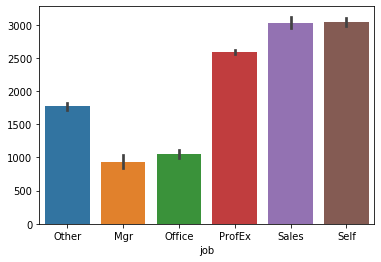

In [48]:
viz_data.barplot(x = "job", y = data.job.index)

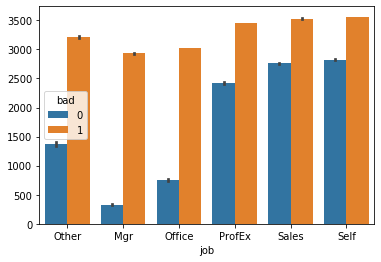

In [49]:
viz_data.barplot(x = "job", y = data.job.index, z = "bad")

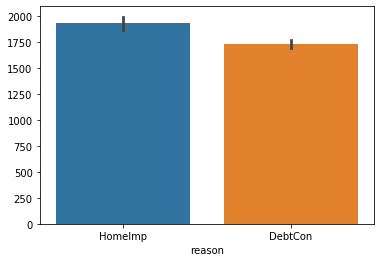

In [51]:
viz_data.barplot(x = "reason", y = data.reason.index)

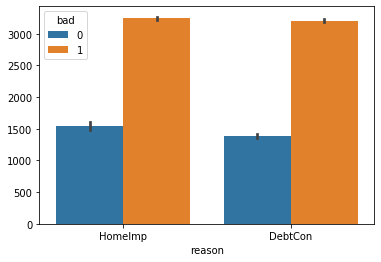

In [52]:
viz_data.barplot(x = "reason", y = data.reason.index, z = "bad")

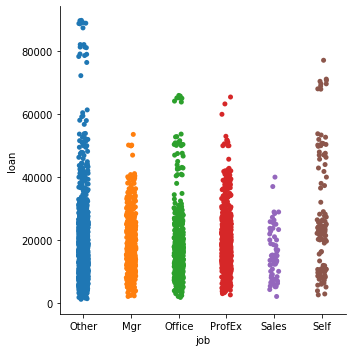

In [46]:
viz_data.catplot(x = "job", y = "loan")

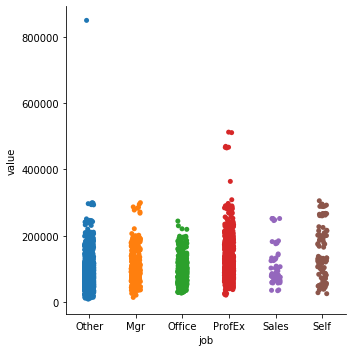

In [47]:
viz_data.catplot(x = "job", y = "value")

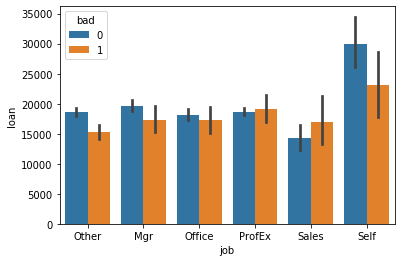

In [53]:
viz_data.barplot(x = "job", y = "loan", z = "bad")

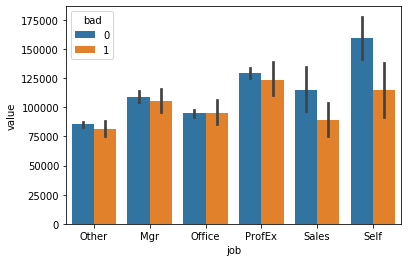

In [54]:
viz_data.barplot(x = "job", y = "value", z = "bad")

In [59]:
viz_data.cross_tab(x = data["bad"], y = data["job"])

job,Mgr,Office,Other,ProfEx,Sales,Self
bad,,,,,,
0,354,494,1252,639,43,81
1,107,75,346,128,23,34


In [60]:
viz_data.cross_tab(x = data["bad"], y = data["reason"])

reason,DebtCon,HomeImp
bad,,
0,2049,814
1,469,244


In [151]:
num_data = inf_data.Num_data

In [79]:
cat_data = inf_data.Cat_data

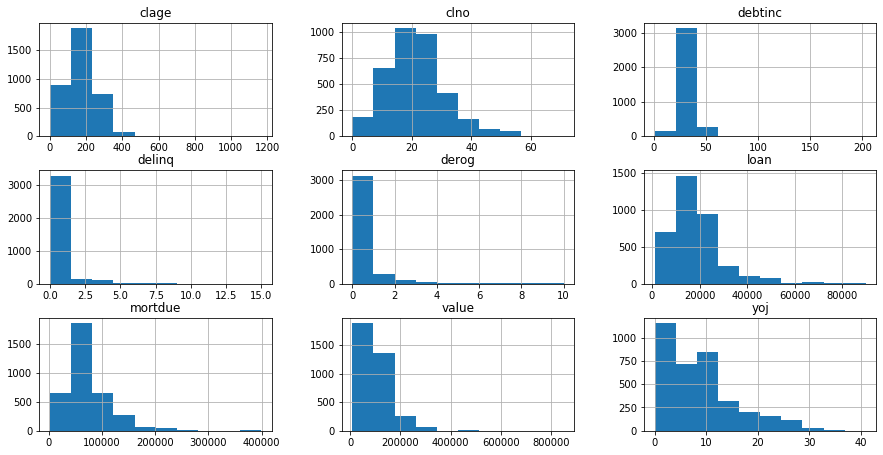

In [78]:
data_hist=data[["loan","clno",'mortdue', "derog","delinq","clage","value", "yoj", "debtinc"]]
data_hist.hist(bins=10,figsize=(15,7.5))
plt.show()

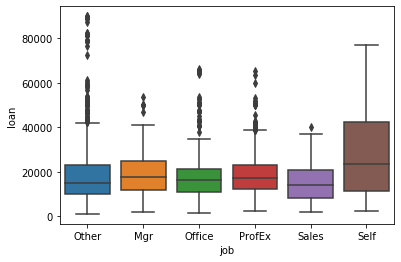

In [80]:
viz_data.boxplot(x = "job", y = "loan")

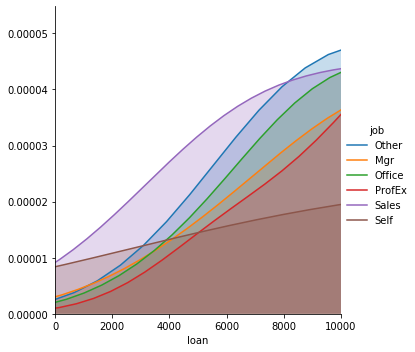

In [84]:
viz_data.histogram("loan", y = "job")

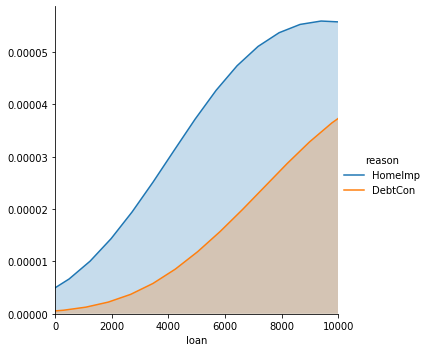

In [86]:
viz_data.histogram("loan", y = "reason")

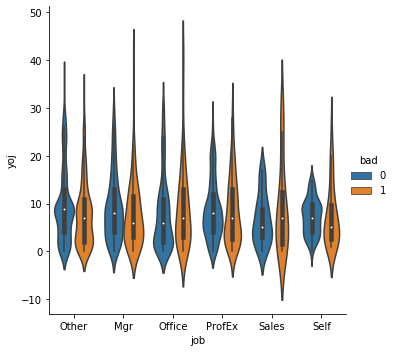

In [93]:
viz_data.violin(x = "job", y = "yoj", z = "bad")

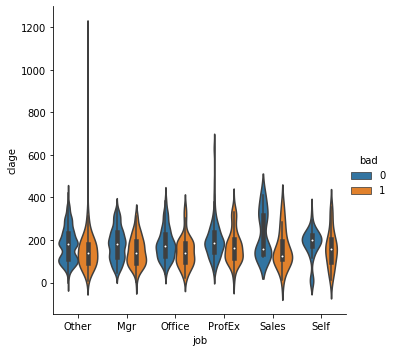

In [94]:
viz_data.violin(x = "job", y = "clage", z = "bad")

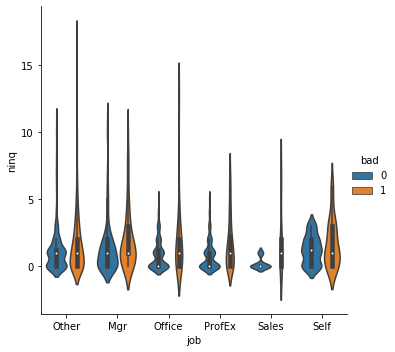

In [95]:
viz_data.violin(x = "job", y = "ninq", z = "bad")

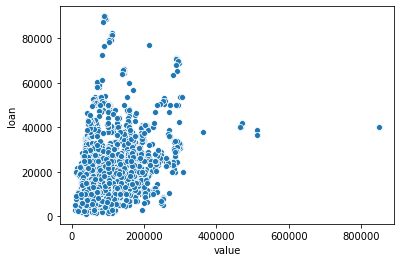

In [96]:
viz_data.scatter(x = "value", y = "loan")  


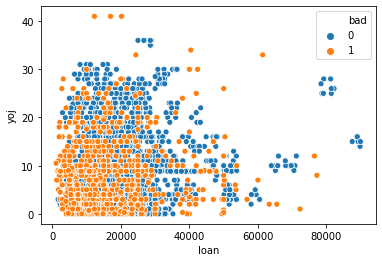

In [104]:
viz_data.scatter(x = "loan", y = "yoj", z = "bad")  

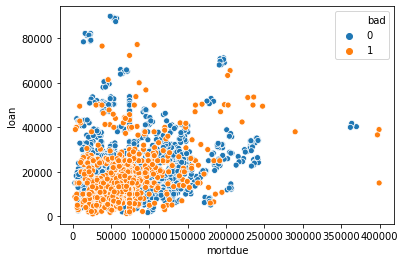

In [110]:
viz_data.scatter(x = "mortdue", y = "loan", z = "bad")  

In [161]:
num_data=data.drop(["bad","job","reason"],axis=1)
corr= num_data.corr()
corr

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
loan,1.000000,0.217712,0.333597,0.117563,0.005027,-0.016308,0.087312,0.047272,0.091312,0.081465
mortdue,0.217712,1.000000,0.801734,-0.083948,-0.050266,-0.003888,0.132132,0.027694,0.320375,0.138838
value,0.333597,0.801734,1.000000,0.002329,-0.049308,-0.001834,0.178965,-0.004971,0.285292,0.115186
yoj,0.117563,-0.083948,0.002329,1.000000,-0.062947,0.072602,0.174704,-0.064541,0.017302,-0.044615
derog,0.005027,-0.050266,-0.049308,-0.062947,1.000000,0.189147,-0.081743,0.138391,0.038165,0.019690
delinq,-0.016308,-0.003888,-0.001834,0.072602,0.189147,1.000000,0.045382,0.070135,0.147031,0.048284
clage,0.087312,0.132132,0.178965,0.174704,-0.081743,0.045382,1.000000,-0.107190,0.215753,-0.035319
ninq,0.047272,0.027694,-0.004971,-0.064541,0.138391,0.070135,-0.107190,1.000000,0.093929,0.103969
clno,0.091312,0.320375,0.285292,0.017302,0.038165,0.147031,0.215753,0.093929,1.000000,0.153781
debtinc,0.081465,0.138838,0.115186,-0.044615,0.019690,0.048284,-0.035319,0.103969,0.153781,1.000000


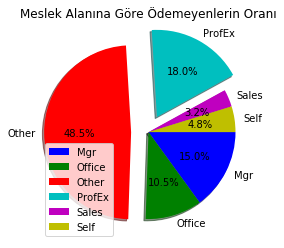

In [173]:
data_prof_inad = pd.crosstab(data['bad'],data['job'])
data_prof_inad = data_prof_inad.T
data_prof_inad = data_prof_inad[1]


plt.pie(data_prof_inad, colors=['b', 'g', 'r', 'c', 'm', 'y'], 
        labels= data_prof_inad.index,explode=(0, 0, 0.2, 0.2, 0, 0),
        autopct='%1.1f%%',
        counterclock=False, shadow=True)

plt.title('Meslek Alanına Göre Ödemeyenlerin Oranı')
plt.legend(data_prof_inad.index,loc=3)
plt.show()

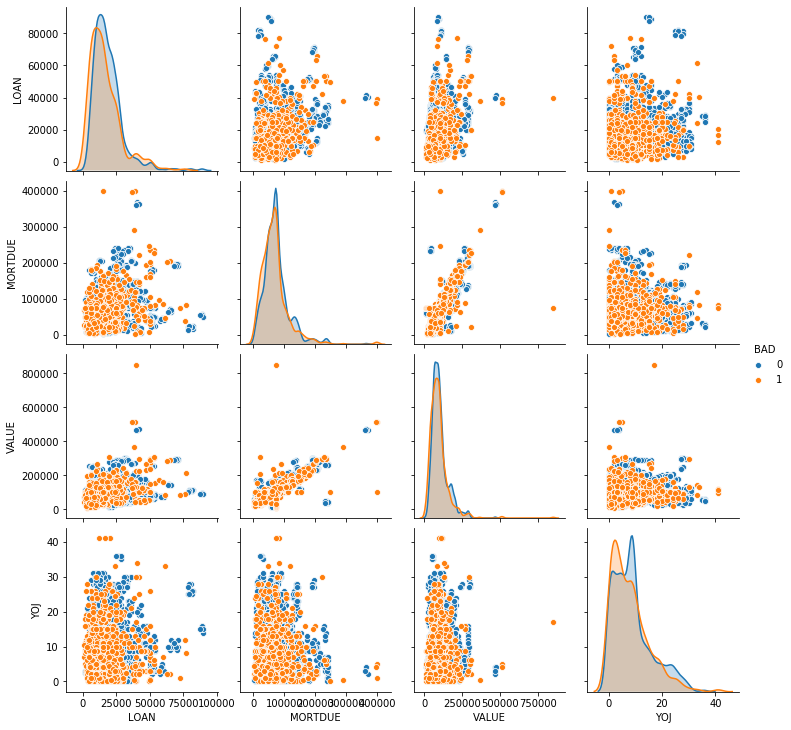

In [176]:



dic = {"LOAN":data["loan"],"BAD":data["bad"],"MORTDUE":data["mortdue"],"VALUE":data["value"],"YOJ":data["yoj"]}


data_pair = pd.DataFrame(dic)
sns.pairplot(data_pair,vars=['LOAN', 'MORTDUE',"VALUE","YOJ"],hue="BAD")

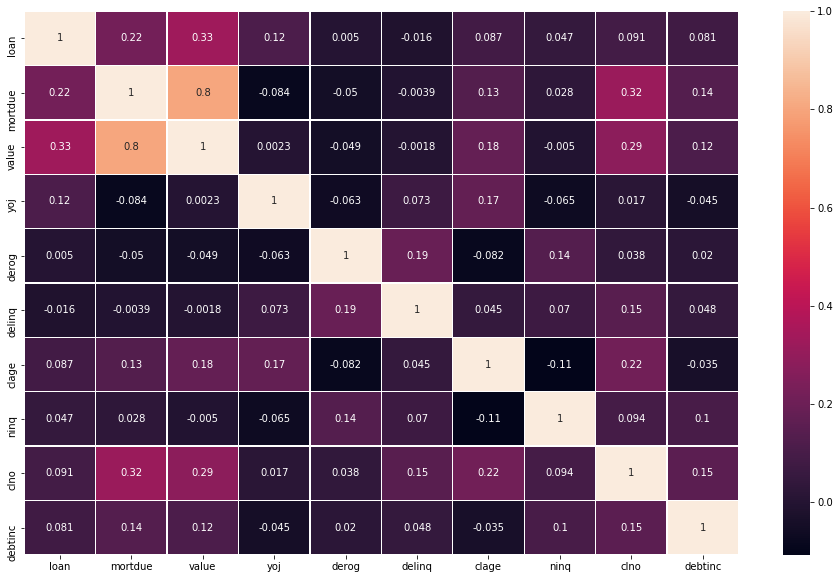

In [177]:
# Korelasyon matrisi ile degişkenler arsaında ki ilişki gözlemlendi.
import matplotlib.pyplot as plt
import seaborn as sns 
corr = ['loan', 'mortdue', 'value', 'reason', 'job', 'yoj', 'derog',
       'delinq', 'clage', 'ninq', 'clno', 'debtinc']
data2 = data[corr]
fig, ax = plt.subplots(figsize=(16,10))   
sns.heatmap(data2.corr(), annot=True, linewidths=.3, ax=ax)

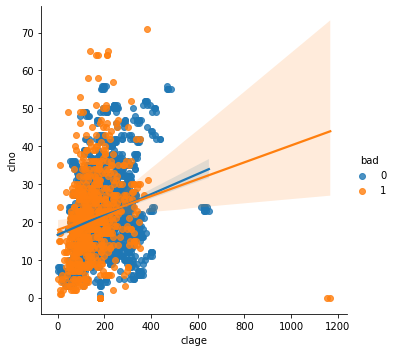

In [178]:
viz_data.lmplot(x="clage", y="clno", z="bad")

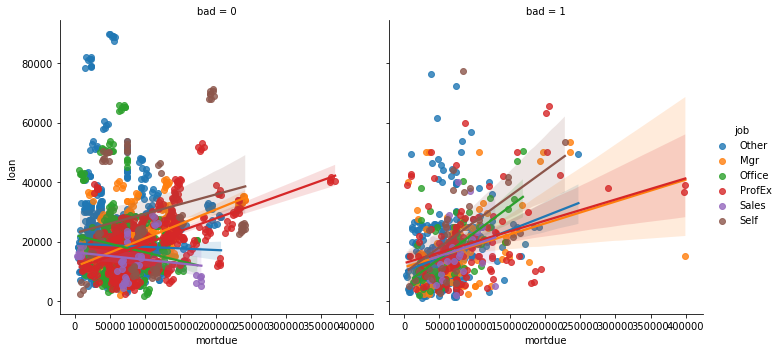

In [185]:
viz_data.lmplot(x="mortdue", y="loan", z="job", c = "bad")

In [191]:
dum_data = pd.get_dummies(data[["job","reason"]])

In [192]:
y = data["bad"]
X_=data.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dum_data[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)

In [194]:
import statsmodels.api as sm
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.396057
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 3576
Model:                          Logit   Df Residuals:                     3560
Method:                           MLE   Df Model:                           15
Date:                Tue, 04 Aug 2020   Pseudo R-squ.:                  0.2072
Time:                        02:28:26   Log-Likelihood:                -1416.3
converged:                       True   LL-Null:                       -1786.4
Covariance Type:            nonrobust   LLR p-value:                5.048e-148
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan           -2.048e-05   5.13e-06     -3.990      0.000   -3.05e-05   -1.04e-05
mortdue        -5.037e-06   1.97e-06     -2.552      0.011    -8.9e-06   -1.17e-06
value           1.991e-06   1.53e-06      1.297      0.194   -1.02e-06       5e-06
yoj               -0.0162      0.007     -2.189      0.029      -0.031      -0.002
derog              0.5118      0.060      8.548      0.000       0.394       0.629
delinq             0.7668      0.050     15.320      0.000       0.669       0.865
clage             -0.0056      0.001     -8.178      0.000      -0.007      -0.004
ninq               0.1622      0.026      6.134      0.000       0.110       0.214
clno              -0.0145      0.005     -2.660      0.008      -0.025      -0.004
debtinc            0.0377      0.006      6.538      0.000       0.026       0.049
job_Mgr           -1.1963      0.223     -5.356      0.000      -1.634      -0.758
job_Office        -1.8783      0.228     -8.249      0.000      -2.325      -1.432
job_Other         -1.2534      0.190     -6.614      0.000      -1.625      -0.882
job_ProfEx        -1.2370      0.207     -5.973      0.000      -1.643      -0.831
job_Sales         -0.1896      0.358     -0.530      0.596      -0.891       0.511
reason_DebtCon    -0.3663      0.106     -3.448      0.001      -0.575      -0.158
==================================================================================
"""

In [195]:
X=X.drop(["reason_DebtCon"],axis=1)

In [196]:
loj=sm.Logit(y,X)
loj_model=loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.397696
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 3576
Model:                          Logit   Df Residuals:                     3561
Method:                           MLE   Df Model:                           14
Date:                Tue, 04 Aug 2020   Pseudo R-squ.:                  0.2039
Time:                        02:32:40   Log-Likelihood:                -1422.2
converged:                       True   LL-Null:                       -1786.4
Covariance Type:            nonrobust   LLR p-value:                2.178e-146
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -2.404e-05   5.14e-06     -4.678      0.000   -3.41e-05    -1.4e-05
mortdue    -5.041e-06   2.01e-06     -2.507      0.012   -8.98e-06    -1.1e-06
value       2.173e-06   1.57e-06      1.387      0.165   -8.97e-07    5.24e-06
yoj           -0.0150      0.007     -2.030      0.042      -0.029      -0.001
derog          0.5091      0.059      8.578      0.000       0.393       0.625
delinq         0.7711      0.050     15.317      0.000       0.672       0.870
clage         -0.0056      0.001     -8.116      0.000      -0.007      -0.004
ninq           0.1527      0.026      5.802      0.000       0.101       0.204
clno          -0.0168      0.005     -3.105      0.002      -0.027      -0.006
debtinc        0.0376      0.006      6.506      0.000       0.026       0.049
job_Mgr       -1.3681      0.219     -6.254      0.000      -1.797      -0.939
job_Office    -2.0326      0.224     -9.063      0.000      -2.472      -1.593
job_Other     -1.4158      0.185     -7.664      0.000      -1.778      -1.054
job_ProfEx    -1.3768      0.204     -6.739      0.000      -1.777      -0.976
job_Sales     -0.4321      0.350     -1.235      0.217      -1.118       0.254
==============================================================================
"""

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [207]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [208]:
accuracy_score(y_test, loj_model.predict(X_test))

0.8303821062441752

In [209]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.827596053997923

In [210]:
loj_model.intercept_

array([-0.0025166])

In [211]:
loj_model.coef_

array([[-2.11157234e-05, -3.88213798e-06, -3.35070697e-07,
        -1.08359806e-02,  2.23866928e-02,  4.15500759e-02,
        -7.65446287e-03,  1.98448315e-02,  5.69094296e-03,
         1.78174511e-02,  1.02460012e-03, -3.09515979e-03,
        -1.03556040e-03, -1.45001797e-03,  7.17894526e-04]])

In [217]:
y_pred = loj_model.predict(X_test)

In [219]:
confusion_matrix(y_test, y_pred)

array([[886,   1],
       [181,   5]], dtype=int64)

In [220]:
accuracy_score(y_test, y_pred)

0.8303821062441752

In [221]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       887
           1       0.83      0.03      0.05       186

    accuracy                           0.83      1073
   macro avg       0.83      0.51      0.48      1073
weighted avg       0.83      0.83      0.76      1073



In [223]:
from sklearn.metrics import roc_auc_score,roc_curve

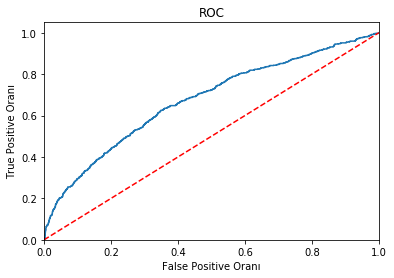

In [224]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()